# Normalisation, Cas concret, scikit learn

Algorithme des plus proches voisins

knn : k nearest neighbors

In [1]:
import numpy as np

In [2]:
import math
from collections import Counter

def kNN(X, y, new_x, k=3):
    """
    args:
        X: jeu de données initiales
        y: classes associées aux éléments de X 
        new_x: nouveau point que l'on souhaite classer
        k: nombre de voisins pris dans l'évaluation

    return:
        La classe de `y` la plus fréquente
    """
    distances = [math.dist(new_x, x) for x in X]
    plus_petites_distances = sorted([(d, c) for (d,c) in zip(distances, y)])[:k]
    counter = Counter([classe for _, classe in plus_petites_distances])
    
    return counter.most_common(1)[0][0]

## Normalisation

### Normalisation: motivation

Création d'un jeu de données d'exemple

In [3]:
from collections import namedtuple

Point = namedtuple('Point', 'x1 x2')

In [4]:
p = Point(1, 2)
p

Point(x1=1, x2=2)

In [5]:
p.x1

1

In [6]:
p[0]

1

In [7]:
# abscisses
list(range(0,12,2))

[0, 2, 4, 6, 8, 10]

In [8]:
points_bleus = [Point(x1, 0) for x1 in range(2,12,2)]
points_rouges = [Point(x1, 1) for x1 in range(0,10,2)]

points = points_bleus + points_rouges
couleurs = ['bleu']*len(points_bleus) + ['rouge']*len(points_rouges)

In [9]:
points

[Point(x1=2, x2=0),
 Point(x1=4, x2=0),
 Point(x1=6, x2=0),
 Point(x1=8, x2=0),
 Point(x1=10, x2=0),
 Point(x1=0, x2=1),
 Point(x1=2, x2=1),
 Point(x1=4, x2=1),
 Point(x1=6, x2=1),
 Point(x1=8, x2=1)]

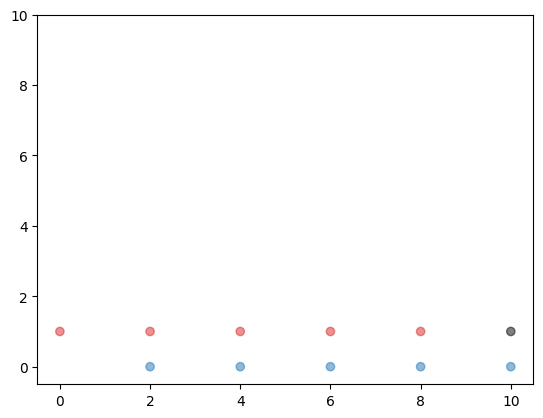

In [10]:
import matplotlib.pyplot as plt

abscisses  = [point.x1 for point in points]
ordonnées = [point.x2 for point in points]

point_inconnu = Point(10, 1)

colors = []
for c in couleurs:
    if c == 'bleu':
        colors.append('tab:blue')
    else:
        colors.append('tab:red')

# point_inconnu
abscisses.append(point_inconnu.x1)
ordonnées.append(point_inconnu.x2)
colors.append('black')

plt.ylim(-0.5, 10)
plt.scatter(abscisses, ordonnées, c=colors, alpha=0.5)
plt.show()

`(10, 1)` serait rouge mais classé bleu pour  k=1


In [11]:
kNN(points, couleurs, point_inconnu, k=1)

'bleu'

In [12]:
kNN(points, couleurs, point_inconnu, k=3)

'bleu'

### Moyenne, variance et écart type

Pour l'ensemble de n valeurs `x = [x_1, ..., x_n ]`, on définit:
- la moyenne (mean):
$$\overline{x} = \mu = \frac{1}{n} \sum_{i=1}^{n}x_{i}$$
- La variance qui est une mesure de la dispersion de l'échantillon, c'est la moyenne des carrés des distances à la moyenne de l'échantillon.
$$Var(x)=\sigma^2=\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\mu)^2$$
- l'écart type (standard deviation) 
$$\sigma=\sqrt{Var(x)}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\overline{x})^2}$$

### Normalisation standard

Pour l'ensemble de n valeurs $x = [x_1, ..., x_n ]$, on définit:
$$z_{i} = \frac{x_{i}-\mu}{\sigma}$$

On utilise `z`à la place de `x`

On fait le même procédé sur chacun des axes

In [13]:
points

[Point(x1=2, x2=0),
 Point(x1=4, x2=0),
 Point(x1=6, x2=0),
 Point(x1=8, x2=0),
 Point(x1=10, x2=0),
 Point(x1=0, x2=1),
 Point(x1=2, x2=1),
 Point(x1=4, x2=1),
 Point(x1=6, x2=1),
 Point(x1=8, x2=1)]

In [14]:
couleurs

['bleu',
 'bleu',
 'bleu',
 'bleu',
 'bleu',
 'rouge',
 'rouge',
 'rouge',
 'rouge',
 'rouge']

In [15]:
x1 = [point.x1 for point in points]
x1

[2, 4, 6, 8, 10, 0, 2, 4, 6, 8]

[statistics — Mathematical statistics functions](https://docs.python.org/3/library/statistics.html)

In [16]:
from statistics import mean, stdev, pstdev
# Moyenne
mean(x1)

5

In [17]:
# Ecart type
pstdev(x1)

3.0

Remarque: stdev sert à évaluer l'écart type d'une population à partir d'un échantillon, ne donne pas le même résultat que la formule proposée qui, comme `pstdev`donne directement l'écart type d'une population.

In [18]:
stdev(x1)

3.1622776601683795

In [19]:
math.sqrt((1/len(x1))*sum([(x1_i - mean(x1))**2 for x1_i in x1]))

3.0

In [20]:
z1 = [(x1_i - mean(x1))/pstdev(x1) for x1_i in x1]
z1

[-1.0,
 -0.3333333333333333,
 0.3333333333333333,
 1.0,
 1.6666666666666667,
 -1.6666666666666667,
 -1.0,
 -0.3333333333333333,
 0.3333333333333333,
 1.0]

In [21]:
mean(z1)

0.0

In [22]:
pstdev(z1)

1.0

In [23]:
x2 = [point.x2 for point in points]
z2 = [(x2_i - mean(x2))/pstdev(x2) for x2_i in x2]
z2

[-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [24]:
mean(z2), pstdev(z2)

(0.0, 1.0)

In [25]:
point_inconnu

Point(x1=10, x2=1)

In [26]:
# valeurs de moyennes et d'écarts types reprises pour la modification des coordonnées du point inconnu
z1_inconnu = (point_inconnu.x1 - mean(x1))/pstdev(x1)
z2_inconnu = (point_inconnu.x2 - mean(x2))/pstdev(x2)

# Pour l'affichage
z1.append(z1_inconnu)
z2.append(z2_inconnu)

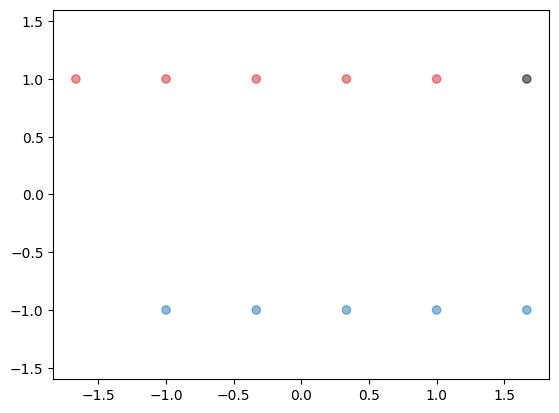

In [27]:
colors = []
for c in couleurs:
    if c == 'bleu':
        colors.append('tab:blue')
    else:
        colors.append('tab:red')
colors.append('black')

plt.ylim(-1.6, 1.6)
plt.scatter(z1, z2, c=colors, alpha=0.5)
plt.show()

### kNN sur données normalisées

In [28]:
z1.pop()
z2.pop()
list(zip(z1, z2))

[(-1.0, -1.0),
 (-0.3333333333333333, -1.0),
 (0.3333333333333333, -1.0),
 (1.0, -1.0),
 (1.6666666666666667, -1.0),
 (-1.6666666666666667, 1.0),
 (-1.0, 1.0),
 (-0.3333333333333333, 1.0),
 (0.3333333333333333, 1.0),
 (1.0, 1.0)]

In [29]:
X_normalisé = list(zip(z1, z2))

In [30]:
point_inconnu_normalisé = Point(z1_inconnu, z2_inconnu)
point_inconnu_normalisé

Point(x1=1.6666666666666667, x2=1.0)

In [31]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=1)

'rouge'

In [32]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=3)

'rouge'

In [33]:
kNN(X_normalisé, couleurs, point_inconnu_normalisé, k=2)

'rouge'